In [1]:
# Importing libraries. The same will be used throughout the article.

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the boston housing data

from sklearn.datasets import load_boston
Boston = load_boston()
boston = pd.DataFrame(Boston.data)

# Importing libraries for scaling the data and splitting it into test and training

from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

boston = pd.DataFrame(scale(boston)) # scaling the data to unit variance and zero mean
boston.columns = Boston.feature_names

X_train, X_test, Y_train, Y_test = train_test_split(boston, Boston.target, train_size=0.8, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


                 0
-1.096645     CRIM
 1.472204       ZN
-0.048895    INDUS
 0.501436     CHAS
-1.889108      NOX
 2.176572       RM
 0.460924      AGE
-3.121155      DIS
 2.642579      RAD
-2.033282      TAX
-1.776553  PTRATIO
 1.050664        B
-4.156020    LSTAT
Rsquared value for training: 0.75
Rsquared value for test: 0.671
   Observed  Predicted
0      28.4  31.077273
1      31.1  31.723405
2      23.5  30.879314
3      26.6  22.276563
4      19.6  18.855284
MSE value for training: 19.2289554465
MSE value for test: 34.4445088808


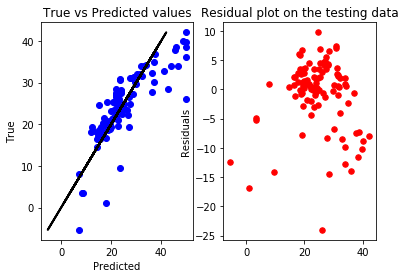

In [2]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train,Y_train)

Coeff = pd.DataFrame(Boston.feature_names, lm_model.coef_)
print(Coeff)

print("Rsquared value for training: " + str(round(lm_model.score(X_train,Y_train),3)))

print("Rsquared value for test: " + str(round(lm_model.score(X_test,Y_test),3)))

train_pred= lm_model.predict(X_train)
Predicted_price= lm_model.predict(X_test)

Result = pd.DataFrame({"Observed":Y_test,"Predicted":Predicted_price})
print(Result.head())


# calculate MAE using scikit-learn
print("MSE value for training: " + str(metrics.mean_squared_error(Y_train, train_pred)))
print("MSE value for test: " + str(metrics.mean_squared_error(Y_test, Predicted_price)))

plt.subplot(1,2,1)
plt.scatter(Y_test, Predicted_price,  color='blue')
plt.title("True vs Predicted values")
plt.plot(Predicted_price,Predicted_price, color='black',linewidth=2)
plt.ylabel("True")
plt.xlabel("Predicted")

plt.subplot(1,2,2)
plt.scatter(lm_model.predict(X_test), (Predicted_price - Y_test), c='r', s=30)
plt.title("Residual plot on the testing data")
plt.ylabel("Residuals")

In [3]:
# Adding a squared value of the predictor variables to the feature data set
from math import log

def quad_basis(df,variables):
    for i,var_name in enumerate(variables):
        for i in range(2,5):  # power of 1 is already there
            colname = var_name+'_%d'%i      # new var will be x_power
            df[colname] = df[var_name]**i
#             col_log_name = var_name +'_log_%d'%i
#             df[col_log_name] = np.log(df[var_name] + 1)

quad_basis(X_train, X_train.columns)
quad_basis(X_test, X_test.columns)

lm_model = LinearRegression()
lm_model.fit(X_train,Y_train)

# pd.DataFrame(zip(Boston.feature_names, lm_model.coef_), columns = ['Feature', 'Coefficient'])

print("Rsquared value for training: " + str(round(lm_model.score(X_train,Y_train),3)))

train_pred= lm_model.predict(X_train)
Predicted_price= lm_model.predict(X_test)

# Result = pd.DataFrame({"Observed":Y_test,"Predicted":Predicted_price})
# Result.head()

print("Rsquared value for test: " + str(round(lm_model.score(X_test,Y_test),3)))

# calculate MAE using scikit-learn
print("MSE value for training: " + str(metrics.mean_squared_error(Y_train, train_pred)))
print("MSE value for test: " + str(metrics.mean_squared_error(Y_test, Predicted_price)))


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Rsquared value for training: 0.872
Rsquared value for test: 0.777
MSE value for training: 9.88296633147
MSE value for test: 23.2706162419


Ridge Regression
alpha	 RMSE_train	 RMSE_test

0.000	 9.9255		 23.7377
10.417	 10.3665		 22.5669
20.833	 10.6828		 22.1969
31.250	 10.9740		 21.9549
41.667	 11.2490		 21.7857
52.083	 11.5107		 21.6688
62.500	 11.7613		 21.5929
72.917	 12.0022		 21.5503
83.333	 12.2346		 21.5353
93.750	 12.4594		 21.5435
104.167	 12.6773		 21.5713
114.583	 12.8891		 21.6157
125.000	 13.0952		 21.6743
135.417	 13.2960		 21.7451
145.833	 13.4920		 21.8263
156.250	 13.6836		 21.9165
166.667	 13.8709		 22.0144
177.083	 14.0543		 22.1190
187.500	 14.2340		 22.2293
197.917	 14.4101		 22.3445
208.333	 14.5828		 22.4640
218.750	 14.7524		 22.5871
229.167	 14.9189		 22.7133
239.583	 15.0825		 22.8421
250.000	 15.2433		 22.9732


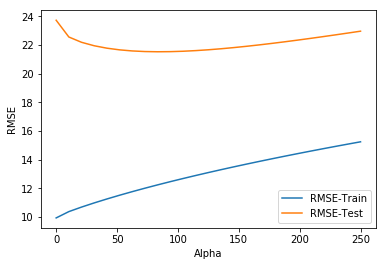

/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


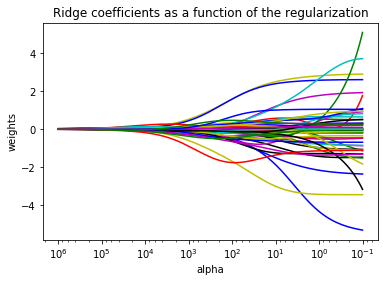

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold

# X_train, X_test, Y_train, Y_test = train_test_split(boston, Boston.target, train_size=0.8, random_state = 32)

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_test\n')
alpha = np.linspace(0,250,25)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    rg_model = Ridge(alpha = a)
    rg_model.fit(X_train,Y_train)
#     print(round(rg_model.score(X_train,Y_train),3))
    train_pred= rg_model.predict(X_train)
    Predicted_price= rg_model.predict(X_test)
#     Result = pd.DataFrame({"Observed":Y_test,"Predicted":Predicted_price})
#     Result.head()
#     print(round(rg_model.score(X_test,Y_test),3))
    # calculate MAE using scikit-learn
    rmse_train = metrics.mean_squared_error(Y_train, train_pred)
    rmse_test = metrics.mean_squared_error(Y_test, Predicted_price)
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_test])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_test))

plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE-Test')
plt.legend( ('RMSE-Train', 'RMSE-Test') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()    


n_alphas = 200
alphas = np.logspace(-1, 6, n_alphas)
clf = Ridge()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, Y_train)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Lasso Regression
alpha	 RMSE_train	 RMSE_test

0.000	 9.8841		 23.2858
0.004	 10.0258		 23.2849
0.008	 10.0683		 23.0945
0.013	 10.1256		 22.9464
0.017	 10.1658		 22.8768
0.021	 10.2077		 22.8172
0.025	 10.2647		 22.7584
0.029	 10.3223		 22.7568
0.033	 10.3818		 22.7791
0.038	 10.4380		 22.8101
0.042	 10.4917		 22.8463
0.046	 10.5403		 22.8465
0.050	 10.5935		 22.8513
0.054	 10.6517		 22.8602
0.058	 10.7159		 22.8707
0.063	 10.7849		 22.8853
0.067	 10.8531		 22.9095
0.071	 10.9217		 22.9412
0.075	 10.9938		 22.9792
0.079	 11.0696		 23.0236
0.083	 11.1494		 23.0712
0.088	 11.2333		 23.1222
0.092	 11.3213		 23.1765
0.096	 11.4134		 23.2342
0.100	 11.5096		 23.2951


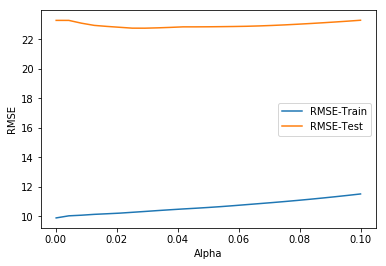

/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


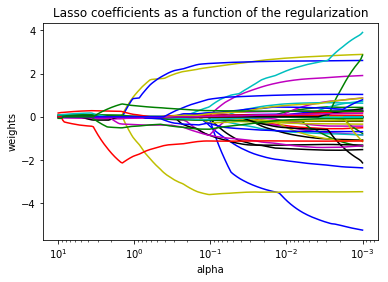

In [5]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, LassoCV,LassoLars
from sklearn.cross_validation import KFold

# SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, 
#              shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, 
#              power_t=0.25, warm_start=False, average=False)[source]

print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_test\n')
alpha = np.linspace(0.0001,0.1,25)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ls_model = Lasso(alpha = a,max_iter= 1000000)
    ls_model.fit(X_train,Y_train)
#     print(round(rg_model.score(X_train,Y_train),3))
    train_pred= ls_model.predict(X_train)
    Predicted_price= ls_model.predict(X_test)
#     Result = pd.DataFrame({"Observed":Y_test,"Predicted":Predicted_price})
#     Result.head()
#     print(round(rg_model.score(X_test,Y_test),3))
    # calculate MAE using scikit-learn
    rmse_train = metrics.mean_squared_error(Y_train, train_pred)
    rmse_test = metrics.mean_squared_error(Y_test, Predicted_price)
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_test])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_test))

plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE-Test')
plt.legend( ('RMSE-Train', 'RMSE-Test') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()    

n_alphas = 200
alphas = np.logspace(-3, 1, n_alphas)
clf = Lasso(max_iter= 100000)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, Y_train)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
